<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [4]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2024-12-10 18:31:13--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  59.7MB/s    in 2.5s    

2024-12-10 18:31:17 (59.7 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [5]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [6]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [7]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [8]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [9]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [10]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [11]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


In [22]:
QUERY = """
SELECT Frsutration, COUNT(*) as count
FROM main
GROUP BY Frustration
ORDER BY Frustration
"""
pd.read_sql_query(QUERY, conn)

DatabaseError: Execution failed on sql '
SELECT Frsutration, COUNT(*) as count
FROM main
GROUP BY Frustration
ORDER BY Frustration
': no such column: Frsutration

## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [9]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


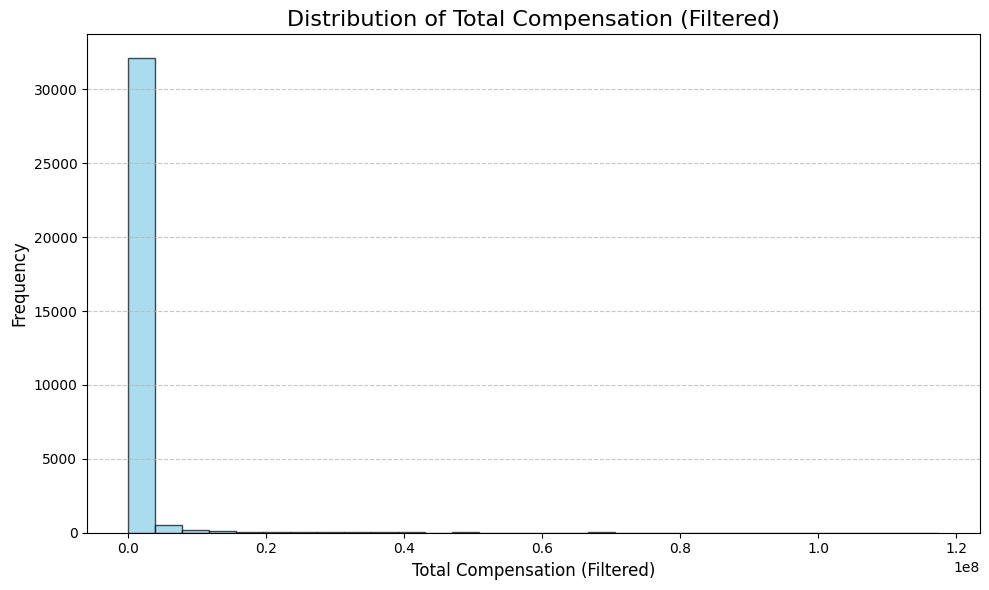

In [13]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Step 1: Load the data from the SQLite database

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Load the data from the main table
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)

# Step 2: Visualizing the distribution of CompTotal using a histogram

# Check if the column exists in the data
if 'CompTotal' in df.columns:
    comp_total = pd.to_numeric(df['CompTotal'], errors='coerce').dropna()

    # Filter out extreme outliers (e.g., 99th percentile)
    upper_limit = comp_total.quantile(0.99)
    comp_total_filtered = comp_total[comp_total <= upper_limit]

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(comp_total_filtered, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title('Distribution of Total Compensation (Filtered)', fontsize=16)
    plt.xlabel('Total Compensation (Filtered)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("The 'CompTotal' column is not available in the dataset.")

**Box Plots**

Plot a box plot of Age.


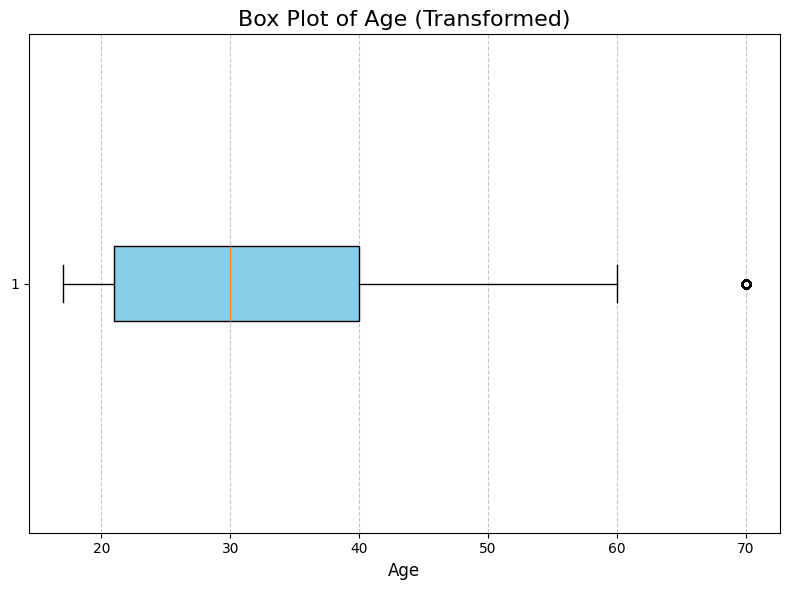

In [19]:
## Write your code here
age_mapping = {
    "Under 18 years old": 17,
    "18-24 years old": 21,
    "25-34 years old": 30,
    "35-44 years old": 40,
    "45-54 years old": 50,
    "55-64 years old": 60,
    "65 years or older": 70
}

# Check if the 'Age' column exists
if 'Age' in df.columns:
    # Map the Age column to numeric values using the mapping dictionary
    df['Age_Transformed'] = df['Age'].map(age_mapping)

    # Drop rows where Age_Transformed is NaN (e.g., "Prefer not to say")
    age_data = df['Age_Transformed'].dropna()

    # Plot the box plot
    if not age_data.empty:
        plt.figure(figsize=(8, 6))
        plt.boxplot(age_data, vert=False, patch_artist=True,
                    boxprops=dict(facecolor='skyblue', color='black'))
        plt.title('Box Plot of Age (Transformed)', fontsize=16)
        plt.xlabel('Age', fontsize=12)
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print("No valid Age data available after transformation.")
else:
    print("The 'Age' column is not available in the dataset.")

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


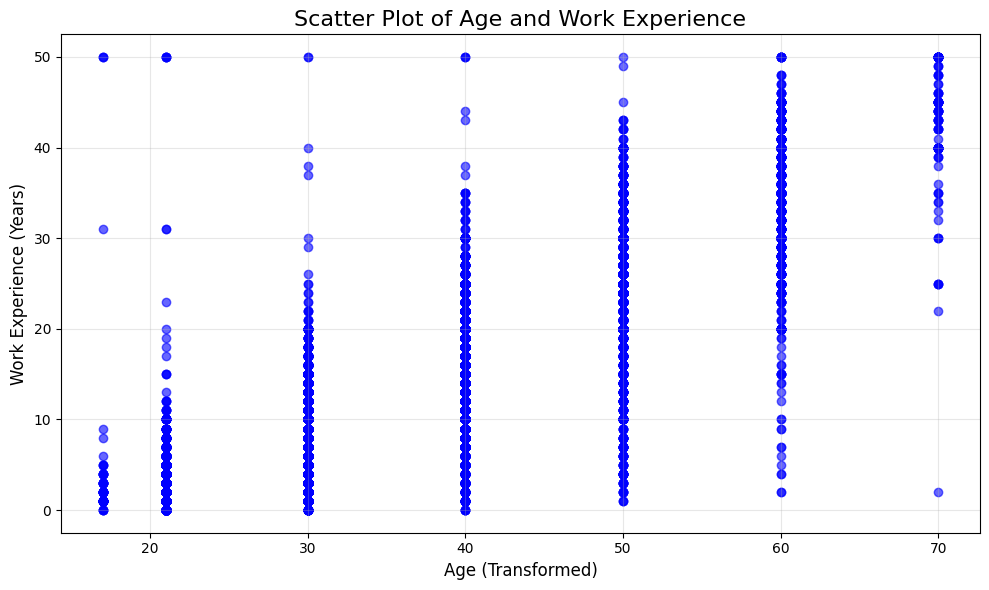

In [20]:
## Write your code here
import matplotlib.pyplot as plt

# Visualizing Relationships in Data: Scatter Plot of Age and WorkExp

# Check if both 'Age_Transformed' and 'WorkExp' columns exist in the dataset
if 'Age_Transformed' in df.columns and 'WorkExp' in df.columns:
    # Convert 'WorkExp' to numeric, handling errors and missing values
    df['WorkExp'] = pd.to_numeric(df['WorkExp'], errors='coerce')
    
    # Drop rows with missing values in either 'Age_Transformed' or 'WorkExp'
    scatter_data = df.dropna(subset=['Age_Transformed', 'WorkExp'])
    
    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(scatter_data['Age_Transformed'], scatter_data['WorkExp'], alpha=0.6, color='blue')
    plt.title('Scatter Plot of Age and Work Experience', fontsize=16)
    plt.xlabel('Age (Transformed)', fontsize=12)
    plt.ylabel('Work Experience (Years)', fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Either 'Age_Transformed' or 'WorkExp' column is not available in the dataset.")

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


In [26]:
# Print unique values for debugging
print("Unique values in 'TimeSearching':")
print(df['TimeSearching'].unique())

print("\nUnique values in 'Frustration':")
print(df['Frustration'].unique())

Unique values in 'TimeSearching':
[nan]

Unique values in 'Frustration':
[nan]


In [27]:
print("Columns in the dataset:")
print(df.columns)

Columns in the dataset:
Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_9', 'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly', 'JobSat', 'Age_Transformed',
       'TimeSearching_Mapped', 'Frustration_Mapped'],
      dtype='object', length=117)


In [30]:
# Inspect the unique values in TimeSearching_Mapped and Frustration_Mapped
print("Unique values in 'TimeSearching_Mapped':")
print(df['TimeSearching_Mapped'].unique())

print("\nUnique values in 'Frustration_Mapped':")
print(df['Frustration_Mapped'].unique())

# Check for rows with missing values in these columns
missing_time_searching = df[df['TimeSearching_Mapped'].isnull()]
missing_frustration = df[df['Frustration_Mapped'].isnull()]

print(f"\nMissing values in 'TimeSearching_Mapped': {len(missing_time_searching)}")
print(f"Missing values in 'Frustration_Mapped': {len(missing_frustration)}")

Unique values in 'TimeSearching_Mapped':
[nan]

Unique values in 'Frustration_Mapped':
[nan]

Missing values in 'TimeSearching_Mapped': 65437
Missing values in 'Frustration_Mapped': 65437


In [31]:
# Inspect the original columns for data
if 'TimeSearching' in df.columns and 'Frustration' in df.columns:
    print("Unique values in 'TimeSearching':")
    print(df['TimeSearching'].unique())

    print("\nUnique values in 'Frustration':")
    print(df['Frustration'].unique())
else:
    print("Original columns 'TimeSearching' and 'Frustration' are not available.")

Unique values in 'TimeSearching':
[nan]

Unique values in 'Frustration':
[nan]


In [37]:
# Reload the CSV file and inspect raw data
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"  # Ensure correct file path
df_reloaded = pd.read_csv(file_path)

# Display raw data from Frustration and TimeSearching columns
if 'Frustration' in df_reloaded.columns and 'TimeSearching' in df_reloaded.columns and 'Age' in df_reloaded.columns:
    print("First 10 rows of 'Frustration':")
    print(df_reloaded['Frustration'].head(10))

    print("\nFirst 10 rows of 'TimeSearching':")
    print(df_reloaded['TimeSearching'].head(10))
    
    print("First 10 rows of 'Age':")
    print(df_reloaded['Age'].head(10))

else:
    print("Columns 'Frustration' and 'TimeSearching' d 'Age' are not present in the reloaded dataset.")


First 10 rows of 'Frustration':
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: Frustration, dtype: object

First 10 rows of 'TimeSearching':
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: TimeSearching, dtype: object
First 10 rows of 'Age':
0    Under 18 years old
1       35-44 years old
2       45-54 years old
3       18-24 years old
4       18-24 years old
5    Under 18 years old
6       35-44 years old
7       18-24 years old
8       45-54 years old
9       35-44 years old
Name: Age, dtype: object


In [29]:
## Write your code here
# Bubble Plot: TimeSearching vs. Frustration with Age as Bubble Size (Handling TEXT Format)

# Define mapping for TimeSearching and Frustration (if they have predefined ranges)
time_searching_mapping = {
    "Less than 15 minutes a day": 7.5,  # Midpoint
    "15-30 minutes a day": 22.5,
    "30-60 minutes a day": 45,
    "60-120 minutes a day": 90,
    "Over 120 minutes a day": 150  # Approximation for "over"
}

frustration_mapping = {
    "Not at all frustrated": 1,
    "A little frustrated": 2,
    "Moderately frustrated": 3,
    "Very frustrated": 4,
    "Extremely frustrated": 5
}

# Bubble Plot: TimeSearching_Mapped vs. Frustration_Mapped with Age as Bubble Size

# Ensure necessary columns are available
if {'TimeSearching_Mapped', 'Frustration_Mapped', 'Age'}.issubset(df.columns):
    # Drop rows with missing values in required columns
    bubble_data = df.dropna(subset=['TimeSearching_Mapped', 'Frustration_Mapped', 'Age'])

    # Check if there's valid data for plotting
    if not bubble_data.empty:
        # Create the bubble plot
        plt.figure(figsize=(10, 6))
        plt.scatter(
            bubble_data['TimeSearching_Mapped'], 
            bubble_data['Frustration_Mapped'], 
            s=bubble_data['Age'] * 5,  # Scale bubble size
            alpha=0.5, 
            color='blue'
        )
        plt.title('Bubble Plot of Time Searching vs. Frustration', fontsize=16)
        plt.xlabel('Time Searching (Mapped)', fontsize=12)
        plt.ylabel('Frustration Level (Mapped)', fontsize=12)
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print("No valid data available for plotting after handling missing values.")
else:
    print("Required columns ('TimeSearching_Mapped', 'Frustration_Mapped', 'Age_Transformed') are not available in the dataset.")

No valid data available for plotting after handling missing values.


### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


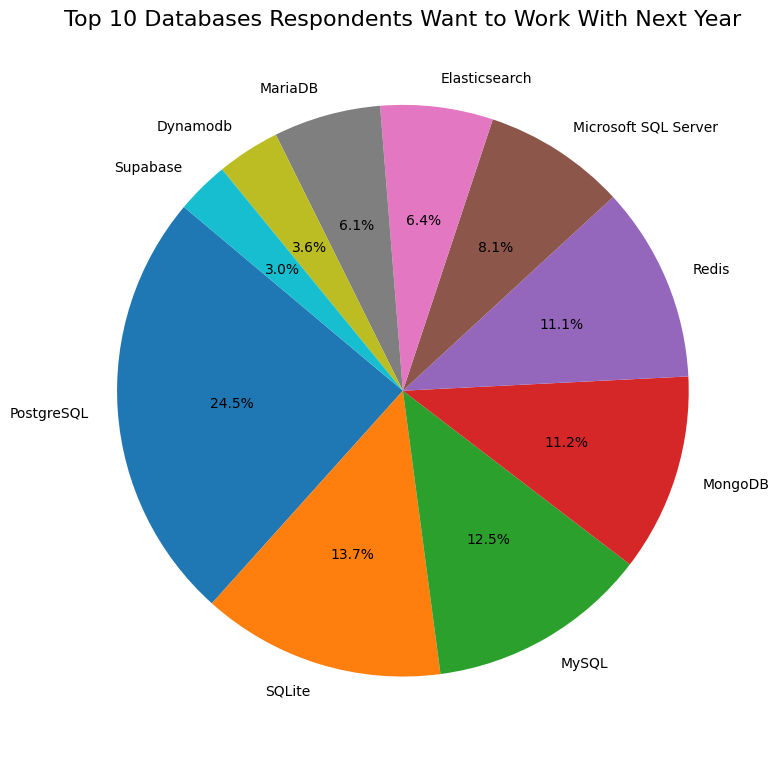

In [53]:
## Write your code here
import matplotlib.pyplot as plt

# Check if the 'DatabaseWantToWorkWith' column exists
if 'DatabaseWantToWorkWith' in df.columns:
    # Split the values in 'DatabaseWantToWorkWith' by ";" and expand into separate rows
    databases = df['DatabaseWantToWorkWith'].dropna().str.split(';').explode()

    # Get the top 5 databases by count
    top_databases = databases.value_counts().head(10)

    # Create the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(top_databases, labels=top_databases.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
    plt.title('Top 10 Databases Respondents Want to Work With Next Year', fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print("The 'DatabaseWantToWorkWith' column is not available in the dataset.")

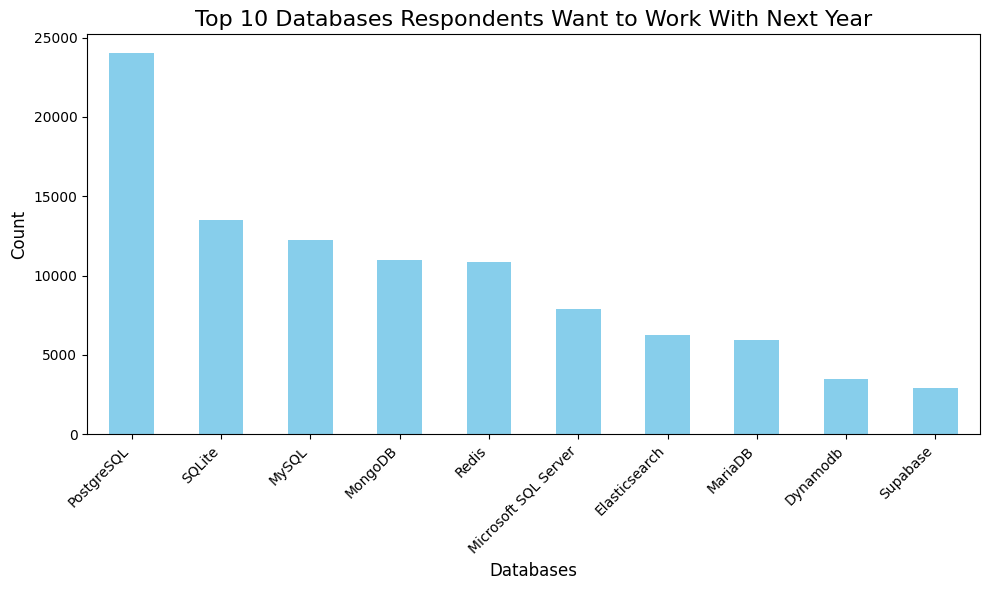

In [73]:
if 'DatabaseWantToWorkWith' in df.columns:
    # Split the values in 'DatabaseWantToWorkWith' by ";" and expand into separate rows
    databases = df['DatabaseWantToWorkWith'].dropna().str.split(';').explode()

    # Get the top 10 databases by count
    top_databases = databases.value_counts().head(10)

    # Create the bar chart
    plt.figure(figsize=(10, 6))
    top_databases.plot(kind='bar', color='skyblue')
    plt.title('Top 10 Databases Respondents Want to Work With Next Year', fontsize=16)
    plt.xlabel('Databases', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("The 'DatabaseWantToWorkWith' column is not available in the dataset.")

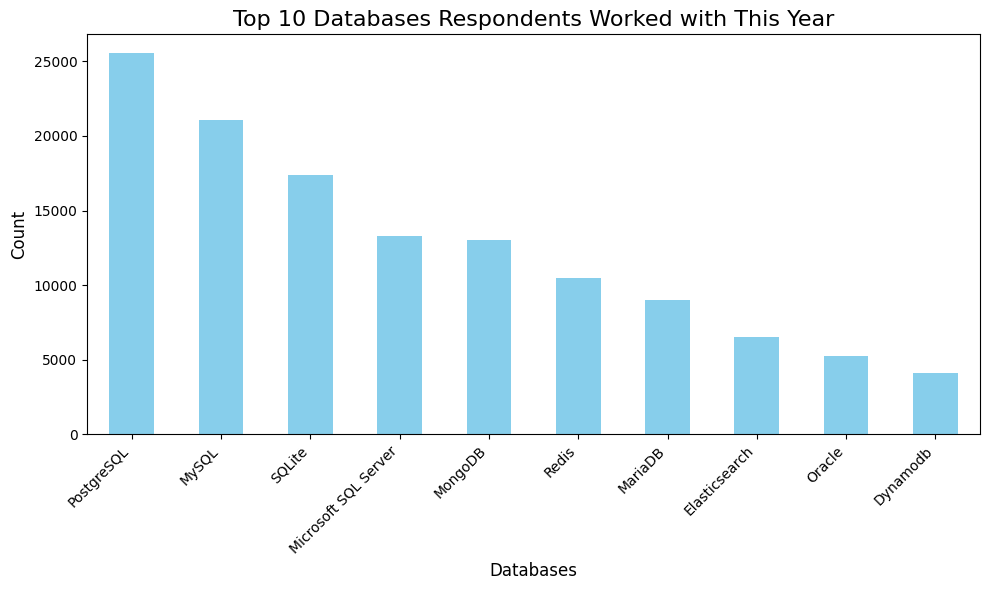

In [81]:
if 'DatabaseHaveWorkedWith' in df.columns:
    # Split the values in 'DatabaseHaveWorkedWith' by ";" and expand into separate rows
    databases_2 = df['DatabaseHaveWorkedWith'].dropna().str.split(';').explode()

    # Get the top 10 databases by count
    top_databases_2 = databases_2.value_counts().head(10)

    # Create the bar chart
    plt.figure(figsize=(10, 6))
    top_databases_2.plot(kind='bar', color='skyblue')
    plt.title('Top 10 Databases Respondents Worked with This Year', fontsize=16)
    plt.xlabel('Databases', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("The 'DatabaseHaveWorkedWith' column is not available in the dataset.")

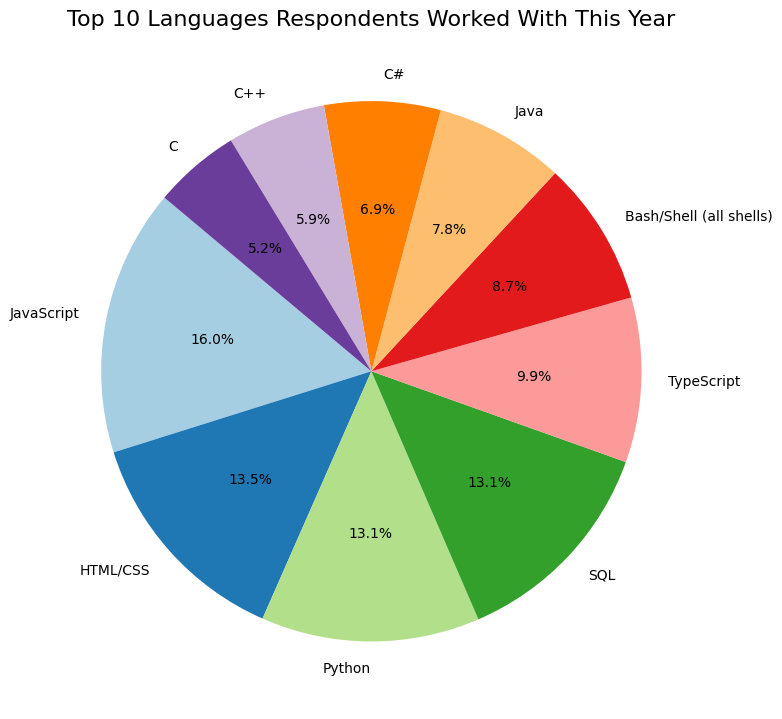

In [80]:
if 'LanguageHaveWorkedWith' in df.columns:
    # Split the values in 'LanguageHaveWorkedWith' by ";" and expand into separate rows
    current_year_languages = df['LanguageHaveWorkedWith'].dropna().str.split(';').explode()

    # Get the top 5 databases by count
    top_languages_current_year = current_year_languages.value_counts().head(10)

    # Create the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(
        top_languages_current_year, 
        labels=top_languages_current_year.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Paired.colors
    )
    plt.title('Top 10 Languages Respondents Worked With This Year', fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print("The 'LanguageHaveWorkedWith' column is not available in the dataset.")

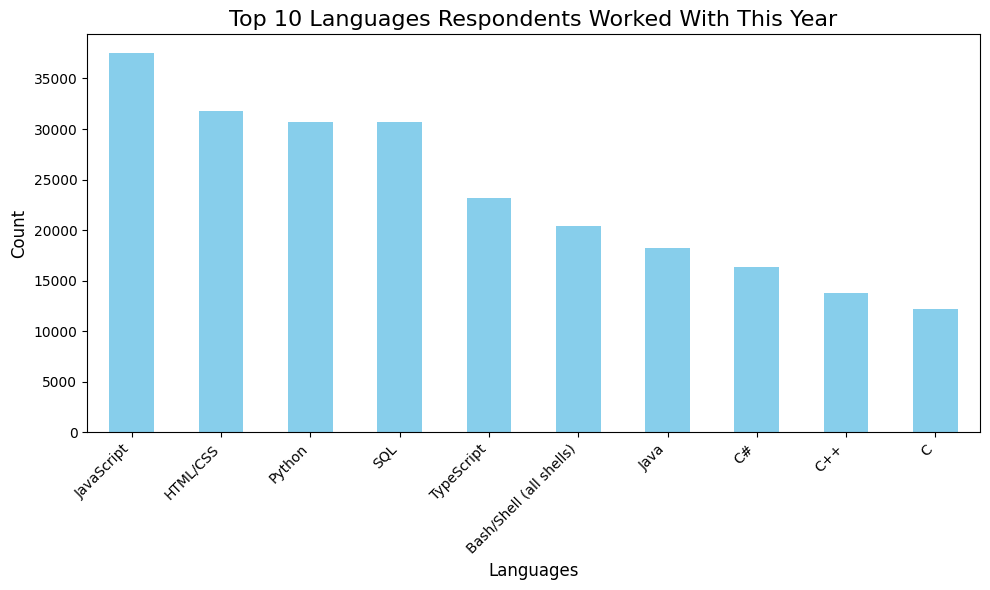

In [84]:
if 'LanguageHaveWorkedWith' in df.columns:
    # Split the values in 'LanguageHaveWorkedWith' by ";" and expand into separate rows
    current_year_languages = df['LanguageHaveWorkedWith'].dropna().str.split(';').explode()

    # Get the top 5 databases by count
    top_languages_current_year = current_year_languages.value_counts().head(10)

   # Create the bar chart
    plt.figure(figsize=(10, 6))
    top_languages_current_year.plot(kind='bar', color='skyblue')
    plt.title('Top 10 Languages Respondents Worked With This Year', fontsize=16)
    plt.xlabel('Languages', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
else:
    print("The 'LanguageHaveWorkedWith' column is not available in the dataset.")

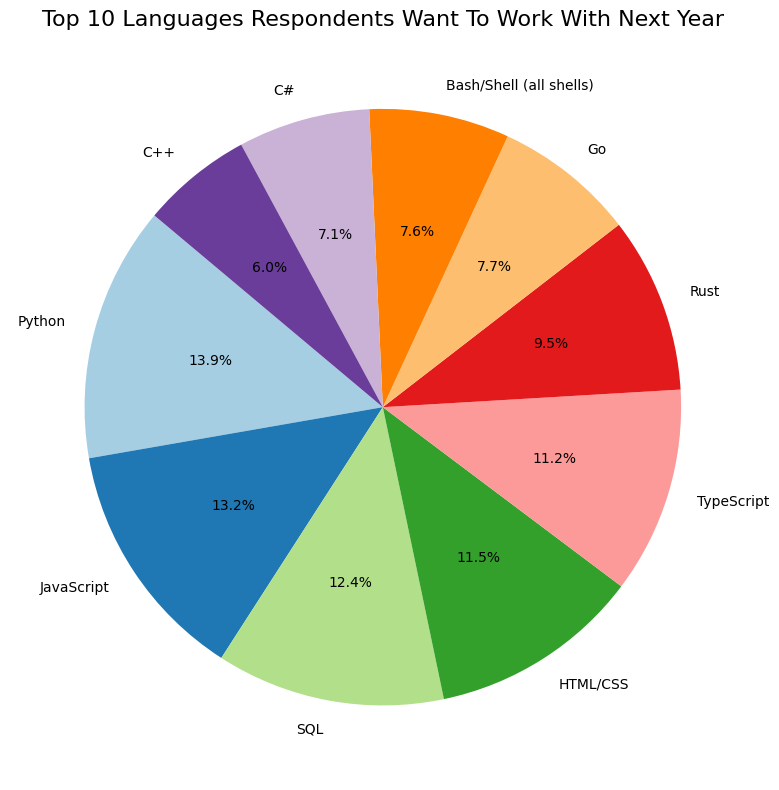

In [54]:
if 'LanguageWantToWorkWith' in df.columns:
    # Split the values in 'LanguageWantToWorkWith' by ";" and expand into separate rows
    next_year_languages = df['LanguageWantToWorkWith'].dropna().str.split(';').explode()

    # Get the top 5 databases by count
    top_languages_next_year = next_year_languages.value_counts().head(10)

    # Create the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(
        top_languages_next_year, 
        labels=top_languages_next_year.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Paired.colors
    )
    plt.title('Top 10 Languages Respondents Want To Work With Next Year', fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print("The 'LanguageWantToWorkWith' column is not available in the dataset.")

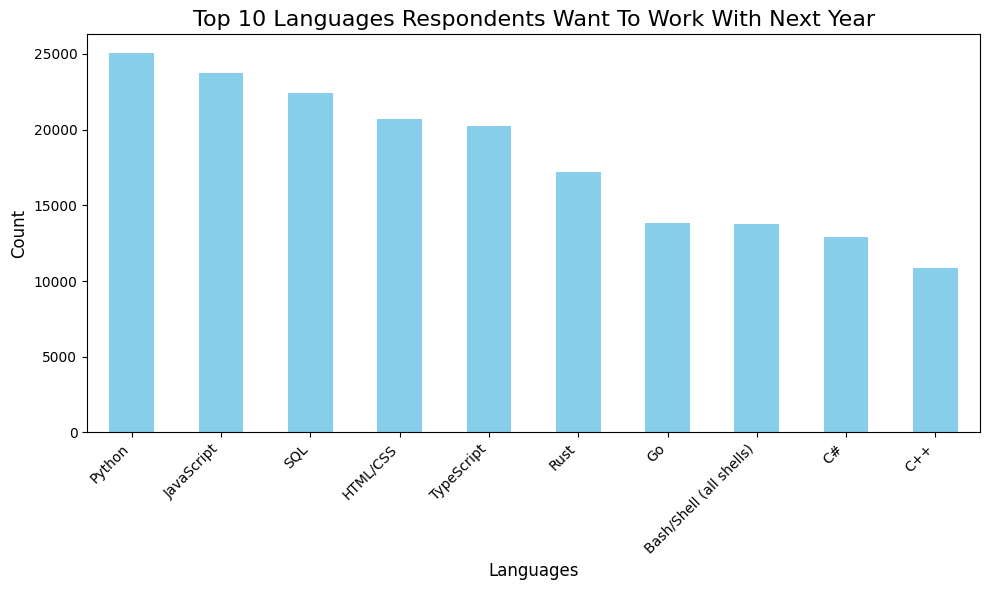

In [85]:
if 'LanguageWantToWorkWith' in df.columns:
    # Split the values in 'LanguageWantToWorkWith' by ";" and expand into separate rows
    next_year_languages = df['LanguageWantToWorkWith'].dropna().str.split(';').explode()

    # Get the top 5 databases by count
    top_languages_next_year = next_year_languages.value_counts().head(10)
   
    # Create the bar chart
    plt.figure(figsize=(10, 6))
    top_languages_next_year.plot(kind='bar', color='skyblue')
    plt.title('Top 10 Languages Respondents Want To Work With Next Year', fontsize=16)
    plt.xlabel('Languages', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("The 'LanguageWantToWorkWith' column is not available in the dataset.")

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


        Activity            Mode Time
0  TimeSearching              No Data
1  TimeAnswering  15-30 minutes a day


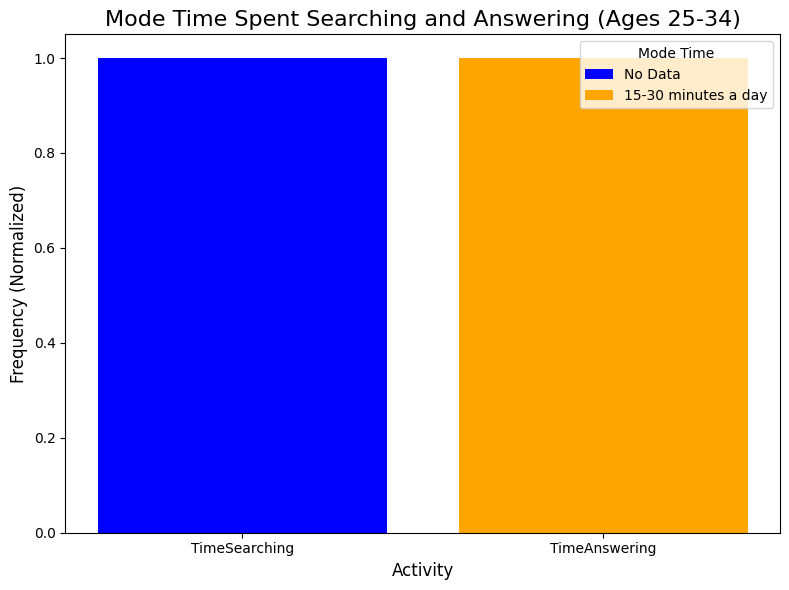

In [48]:
## Write your code here
# Filter data for the age group "25-34 years old"
age_filtered = df[df['Age'].str.contains("25-34", na=False)]

# Check if the necessary columns exist
if {'TimeSearching', 'TimeAnswering'}.issubset(df.columns):
    # Calculate the mode (most frequent value) for 'TimeSearching' and 'TimeAnswering'
    mode_time_searching = age_filtered['TimeSearching'].mode().iloc[0] if not age_filtered['TimeSearching'].mode().empty else "No Data"
    mode_time_answering = age_filtered['TimeAnswering'].mode().iloc[0] if not age_filtered['TimeAnswering'].mode().empty else "No Data"

    # Create a DataFrame for the stacked bar chart
    data = pd.DataFrame({
        'Activity': ['TimeSearching', 'TimeAnswering'],
        'Mode Time': [mode_time_searching, mode_time_answering]
    })

    # Display the mode values
    print(data)

    # Create a stacked bar chart for visualization
    plt.figure(figsize=(8, 6))
    plt.bar(data['Activity'], [1, 1], color=['blue', 'orange'], label=data['Mode Time'])
    plt.title('Mode Time Spent Searching and Answering (Ages 25-34)', fontsize=16)
    plt.xlabel('Activity', fontsize=12)
    plt.ylabel('Frequency (Normalized)', fontsize=12)
    plt.legend(title='Mode Time')
    plt.tight_layout()
    plt.show()
else:
    print("Required columns ('TimeSearching', 'TimeAnswering') are not available in the dataset.")

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


In [ ]:
## Write your code here

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


In [ ]:
## Write your code here

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
